In [2]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import sys
from collections import OrderedDict
import numpy as np
import pandas as pd

from mstat.indexes import FullIndex

#s = 'bcdbaecdcd'
s = open('../../fast_ms/tests/a.s').read().strip()[::1]
#t = open('../code_test/maxrep_inputs/rnd_200_128.t').read().strip()

#s = open('ssss').read().strip()[::-1]
#t = open('tttt').read().strip()

s_index = FullIndex(s[::1])
"".join(s_index.tabs[FullIndex.FWD].BWT.values)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'accabcaabc#b'

In [3]:
dd = pd.DataFrame([_ for _ in FullIndex(s[::-1]).maxrep_iter() if _[3] is False], 
                  columns = ["s_idx", "s", "sa_idx", "maximal"])
dd

,s_idx,s,sa_idx,maximal
0,"(2, 4)",ba,"(5, 7)",False
1,"(7, 9)",ba,"(5, 7)",False


In [5]:
#ms_table(t, s)#[50:80]
s_index.tabs[FullIndex.FWD]

,s_i,BWT,SA,suff_SA
i,,,,
0,c,a,12,#
1,b,c,11,a#
2,a,c,7,aabca#
3,b,a,8,abca#
4,c,b,3,abccaabca#
5,c,c,2,babccaabca#
6,a,a,9,bca#
7,a,a,4,bccaabca#
8,b,b,10,ca#


In [12]:
s[::1]
s_index.tabs[FullIndex.REV]

,s_i,BWT,SA,suff_SA
i,,,,
0,b,e,13,#
1,e,e,7,aceeae#
2,a,e,11,ae#
3,e,e,3,aeeeaceeae#
4,e,#,1,beaeeeaceeae#
5,e,a,8,ceeae#
6,a,a,12,e#
7,c,e,6,eaceeae#
8,e,e,10,eae#


In [15]:
                             # 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4
                             # 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
#wrong_runs = [-1] + map(int, "0 1 1 1 1 1 1 1 1 1 1 1 1 1 1".split())
#print len(wrong_runs), wrong_runs

dd = ms_table(t, s[::-1]); #dd['_runs'] = wrong_runs
dd

,t_i,MS,nzeros,ms,runs
i,,,,,
-1,,1,0,,-1
0,a,2,2,001,0
1,a,3,2,001,0
2,d,2,0,1,1
3,d,3,2,001,0
4,a,3,1,01,0
5,e,2,0,1,1
6,c,2,1,01,0
7,c,2,1,01,0


In [12]:
s_index.alp

'#abcd'

# Repeat text with uniform length repeats

[28]


/Users/denas/arch/Darwin_x86_64/lib/python/site-packages/ipykernel/__main__.py:36: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


Counter({3: 3, 11: 1, 13: 1, 23: 1, 24: 2})

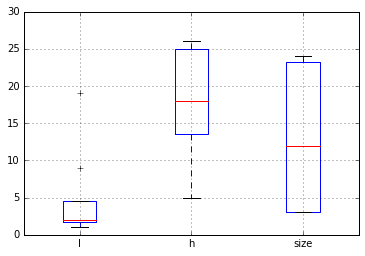

In [6]:
import random
import numpy as np
import pandas as pd


def dump_str(L, seed_pool):
    char_dumped = 0 
    while char_dumped < L:
        seed_str = random.choice(seed_pool)
        n = len(seed_str)

        repeat_length = random.choice(xrange(n))
        repeat_start_position = random.choice(xrange(n - repeat_length))
        assert repeat_length + repeat_start_position <= n
        
        to_write = seed_str[repeat_start_position:(repeat_start_position + repeat_length)]
        char_dumped += len(to_write)
        yield (repeat_start_position, (repeat_start_position + repeat_length))

def _repeat_input_type((t_path, t_len), (s_path, s_len), source,
                       seed_len, seed_nr):
    seed_pool = []
    for seed_idx in range(seed_nr):
        current_seed = "".join([random.choice(source) for i in range(seed_len)])
        seed_pool.append(current_seed)

    with open(t_path, 'w') as fd: 
        dump_str(fd, t_len)
    with open(s_path, 'w') as fd: 
        dump_str(fd, s_len)

seed_pool = ['ababababbababbabababababaaaa']
print map(len, seed_pool)
d = pd.DataFrame(data = list(dump_str(100, seed_pool)), columns = ['l', 'h'])
d['size'] = (d.h - d.l)
d.boxplot()

from collections import Counter
Counter(d['size'].tolist())

# stats of input strings

In [8]:
import sys
sys.path.append('../')
from os import path

from utils import MsInput

inp = MsInput.basedir_form('./big_paper2/', 'rep_100000000s_dis_500000t_abcd_sim1000')


'./big_paper2/rep_100000000s_dis_500000t_abcd_sim1000.s'

In [6]:
inp

msinput_pair(s_path='./big_paper2/./rep_100000000s_dis_500000t_abcd_sim1000.s', t_path='./big_paper2/./rep_100000000s_dis_500000t_abcd_sim1000.t')